In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10

N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(255/256, 1, N)    ## red  255,192, 203
vals[:, 1] = np.linspace(192/256, 1, N)
vals[:, 2] = np.linspace(203/256, 1, N)  ## blue 75, 0, 130

Pinks = ListedColormap(vals)
top = cm.get_cmap(Pinks, 256)
bottom = cm.get_cmap('Purples', 256)
newcolors = np.vstack((top(np.linspace(0, 1, 256)),
                       bottom(np.linspace(0, 1, 256))))
newcmp = ListedColormap(newcolors, name='PinkPueple')

np.random.seed(17)

In [2]:
data = pd.read_csv('data_normalized.csv')
data.head(5)

,weight,height,closing,open_00_01,open_01_02,open_02_03,open_03_04,open_04_05,open_05_06,open_06_07,...,cuisine_y_Pizzeria,cuisine_y_Regional,cuisine_y_Seafood,cuisine_y_Vietnamese,parking_lot_none,parking_lot_public,parking_lot_valet parking,parking_lot_yes,age,target
0,0.256667,0.57125,-2.832176,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.452882,2
1,0.256667,0.57125,0.821926,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,-0.452882,0
2,0.256667,0.57125,-0.396108,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,-0.452882,1
3,0.256667,0.57125,0.517418,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.452882,2
4,0.256667,0.57125,0.517418,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,-0.452882,2


## Correlation Matrix

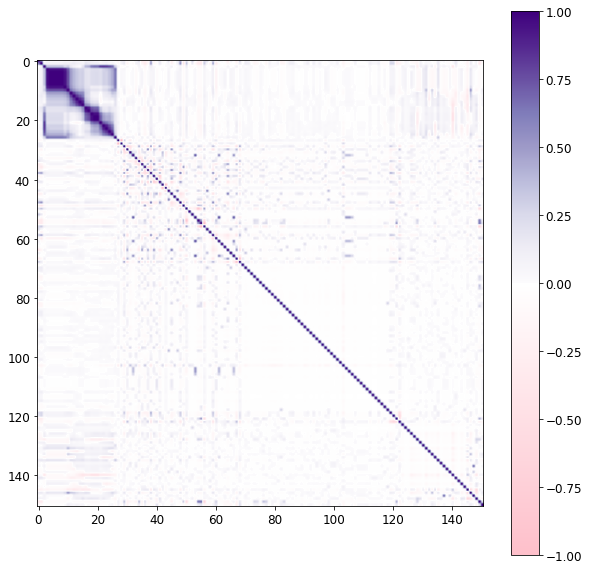

In [3]:
corr_matrix = np.corrcoef(data.T)
pd.DataFrame(corr_matrix)
plt.figure(figsize=(10,10))
plt.imshow(corr_matrix, cmap = newcmp, vmax = 1, vmin = -1)
plt.colorbar()
plt.show()

## training set, validation set, testing set

In [4]:
def split_data(data_x: np.ndarray, data_y: np.ndarray):
    
    ordering = np.arange(data_x.shape[0])
    np.random.shuffle(ordering)
    data_x = data_x[ordering]
    data_y = data_y[ordering]
    
    valid_start = int(len(data_x) * 0.7)
    test_start = int(len(data_x) * 0.9)
    
    train_set = (data_x[:valid_start], data_y[:valid_start])
    valid_set = (data_x[valid_start:test_start], data_y[valid_start:test_start])
    test_set = (data_x[test_start:], data_y[test_start:])
    
    return train_set, valid_set, test_set

In [5]:
y = np.array(data['target'])
x = np.array(data.drop(['target'], axis=1))

train_set, valid_set, test_set = split_data(x,y)

print(train_set[0].shape)
print(valid_set[0].shape)
print(test_set[0].shape)

(2073, 150)
(592, 150)
(297, 150)


In [6]:
x_train = train_set[0]
y_train = train_set[1]

x_val = valid_set[0]
y_val = valid_set[1]

x_test = test_set[0]
y_test = test_set[1]

## Simple Linear Regression - worth try :)

In [7]:
reg = Lin_Reg()
reg.fit(x_train, y_train)
coefficients = reg.coef_
reg.predict(x_val)

print('Simple Linear Regression')
print('\nCoefficients: {:}'.format(coefficients))

output = np.round(reg.predict(x_train) ).astype(int)
target = y_train
accuracy = sum(output == target)/ len(target)
print("\n\nAccuracy on train set: {:.2f} %".format(accuracy*100))

output = np.round(reg.predict(x_val) ).astype(int)
target = y_val
accuracy = sum(output == target)/ len(target)
print("\n\nAccuracy on validation set: {:.2f} %".format(accuracy*100))

print('\nAverage Cross Validation in training set:\t{:}'.format(np.average(cross_val_score(reg,x_train, y_train, scoring ='r2',cv = 5))))
print('Average Cross Validation in test set:\t{:}'.format(np.average(cross_val_score(reg,x_test, y_test, scoring ='r2',cv = 5))))

Simple Linear Regression

Coefficients: [ 6.82445423e-02 -1.77949387e-02  5.06192344e-02  7.10086681e-02
  1.95628228e+11  4.96291167e+11 -1.00760759e+12  3.04968096e+11
  1.07200996e+10  1.11026764e-01  4.18487549e-01 -5.60474396e-02
 -9.26551819e-02  3.67591858e-01 -2.62458801e-01  1.79979324e-01
 -2.98789978e-01  9.76715088e-02 -4.03404236e-03  6.35272594e+10
 -6.35272594e+10 -3.58814240e-01  4.20150757e-02  2.14736938e-01
  4.23431396e-02 -1.49032593e-01 -1.35147095e-01 -3.47573792e+11
 -3.47573792e+11  1.95070946e+11  1.95070946e+11  1.95070946e+11
  1.87470867e+11  1.87470867e+11  1.87470867e+11  1.87470867e+11
  8.36398233e+09  8.36398233e+09  8.36398233e+09  1.68856601e+10
  1.68856601e+10  1.68856601e+10  1.90087766e+11  1.90087766e+11
  1.90087766e+11  5.41880168e+11  5.41880168e+11  5.41880168e+11
  5.41880168e+11  5.41880168e+11  4.53746239e+09  4.53746239e+09
  4.53746239e+09  4.53746239e+09  4.53746239e+09 -4.74158140e+10
 -4.74158140e+10 -4.74158140e+10 -1.18869111e+11 -

# Ridge Regression

In [8]:
# Run for different values of lambda 
lambda_min = -5
lambda_max = 10
eta = 10

num_lambdas = eta * (lambda_max- lambda_min)
num_predictors = x.shape[1]
lambdas= np.linspace(lambda_min,lambda_max, num_lambdas)

train_accuracy = np.zeros(num_lambdas)
val_accuracy = np.zeros(num_lambdas)
coeff_a = np.zeros((num_lambdas, num_predictors))

In [9]:
for ind, i in enumerate(lambdas):    
    # Fit ridge regression on train set
    reg = Ridge_Reg(alpha = 10**i)
    reg.fit(x_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    
    # Evaluate train & test performance
    output = np.round(reg.predict(x_train)).astype(int)
    target = y_train
    train_accuracy[ind] = sum(output == target)/ len(target)
    
    output = np.round(reg.predict(x_val)).astype(int)
    target = y_val
    val_accuracy[ind] = sum(output == target)/ len(target)

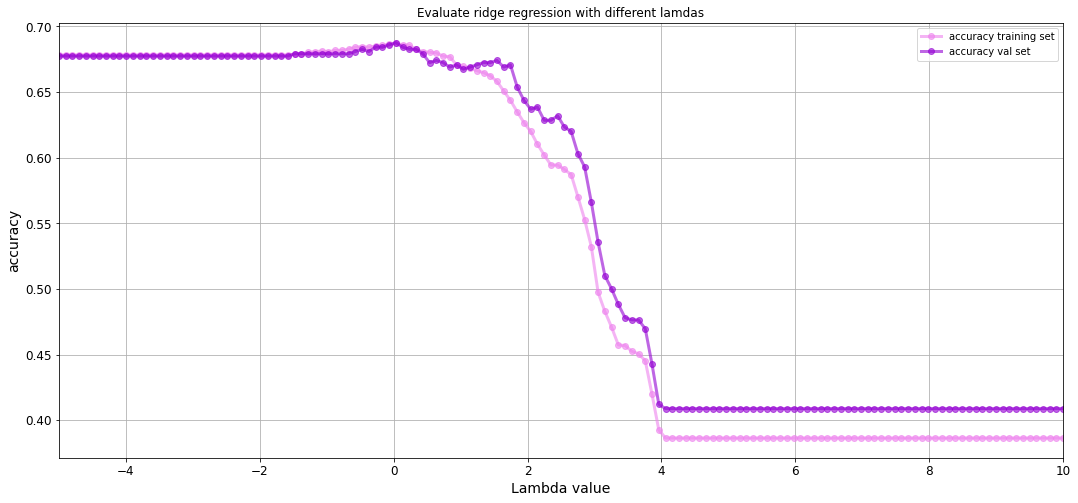

In [10]:
# Plotting
plt.figure(figsize=(18, 8))

plt.plot(lambdas, train_accuracy, 'bo-', label=r'accuracy training set', color="violet", alpha=0.6, linewidth=3)
plt.plot(lambdas, val_accuracy, 'bo-', label=r'accuracy val set', color="darkviolet", alpha=0.6, linewidth=3)

plt.xlabel('Lambda value'); plt.ylabel(r'accuracy')
plt.xlim(lambda_min, lambda_max)
plt.title(r'Evaluate ridge regression with different lamdas')
plt.legend(loc='best')
plt.grid()

# Logistic regression

In [11]:
n=30

C_arr = np.linspace(-10, 5, n)
train_accuracy = np.zeros(n)
val_accuracy = np.zeros(n)

for ind, C in enumerate(C_arr):    
    
    logreg = LogisticRegression(solver='newton-cg', C=10**C)
    logreg.fit(x_train, y_train)

    
    # Evaluate train & test performance
    output = logreg.predict(x_train)
    target = y_train
    train_accuracy[ind] =sum(output == target)/ len(target)

    output = logreg.predict(x_val)
    target = y_val
    val_accuracy[ind] =sum(output == target)/ len(target)

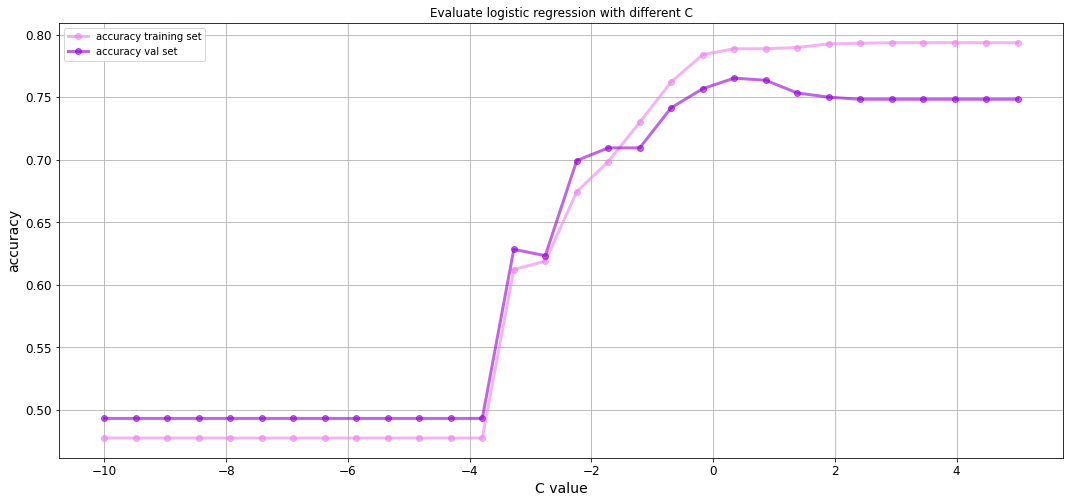

In [12]:
# Plotting
plt.figure(figsize=(18, 8))

plt.plot(C_arr, train_accuracy, 'bo-', label=r'accuracy training set', color="violet", alpha=0.6, linewidth=3)
plt.plot(C_arr, val_accuracy, 'bo-', label=r'accuracy val set', color="darkviolet", alpha=0.6, linewidth=3)

plt.xlabel('C value'); plt.ylabel(r'accuracy')
plt.title(r'Evaluate logistic regression with different C')
plt.legend(loc='best')
plt.grid()

In [13]:
index = np.argmax(val_accuracy)
C_best= C_arr[index]

logreg = LogisticRegression(solver = 'newton-cg',C=10**C_best)
logreg.fit(x_train, y_train)
coefficients = logreg.coef_

print('Logistic Regression')

output = logreg.predict(x_train)
target = y_train
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on train set: {:.2f} %".format(accuracy*100))

output = logreg.predict(x_val)
target = y_val
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on validation set: {:.2f} %".format(accuracy*100))


output = logreg.predict(x_test)
target = y_test
accuracy = sum(output == target)/ len(target)
print("\nAccuracy on validation set: {:.2f} %".format(accuracy*100))

Logistic Regression

Accuracy on train set: 78.87 %

Accuracy on validation set: 76.52 %

Accuracy on validation set: 75.08 %


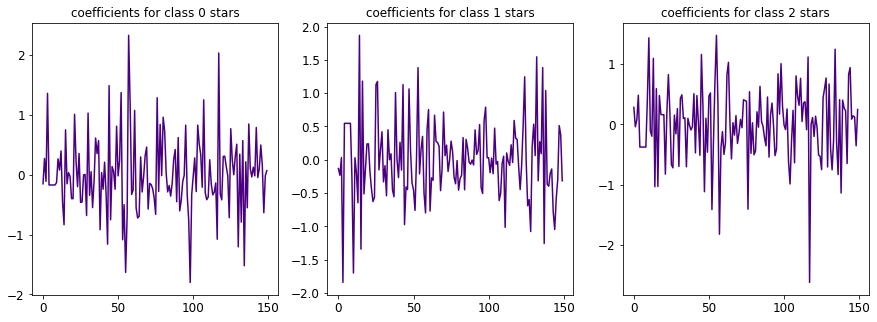

In [14]:
fig, axs= plt.subplots(1,3, figsize=(15,5))
axs[0].plot(coefficients[0],c='indigo')
axs[1].plot(coefficients[1],c='indigo')
axs[2].plot(coefficients[2],c='indigo')

axs[0].set_title("coefficients for class 0 stars")
axs[1].set_title("coefficients for class 1 stars")
axs[2].set_title("coefficients for class 2 stars")

plt.show()